<a href="https://colab.research.google.com/github/navilaufm/ML_LR_rainfall_MGGT/blob/main/NCEI_wx_data_daily_surface.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# WX data exploration
https://www.ncei.noaa.gov/access/search/dataset-search?observationTypes=Land%20Surface

In [ ]:
import pandas as pd

In [ ]:
stn = '78647099999'
yr1 = 2001
yr2 = 2020
base_url='https://www.ncei.noaa.gov/data/global-hourly/access/<yr>/<stn>.csv'

In [ ]:
years = range(yr1, yr2+1)
for year in years:
  url = base_url.replace('<yr>',str(year)).replace('<stn>',stn)
  print(year,url)
  if year == yr1:
      data = pd.read_csv(url)
  else:
    new_data = pd.read_csv(url)
    data = data.append(new_data, ignore_index=True)


2001 https://www.ncei.noaa.gov/data/global-hourly/access/2001/78647099999.csv
2002 https://www.ncei.noaa.gov/data/global-hourly/access/2002/78647099999.csv
2003 https://www.ncei.noaa.gov/data/global-hourly/access/2003/78647099999.csv
2004 https://www.ncei.noaa.gov/data/global-hourly/access/2004/78647099999.csv
2005 https://www.ncei.noaa.gov/data/global-hourly/access/2005/78647099999.csv
2006 https://www.ncei.noaa.gov/data/global-hourly/access/2006/78647099999.csv
2007 https://www.ncei.noaa.gov/data/global-hourly/access/2007/78647099999.csv
2008 https://www.ncei.noaa.gov/data/global-hourly/access/2008/78647099999.csv
2009 https://www.ncei.noaa.gov/data/global-hourly/access/2009/78647099999.csv
2010 https://www.ncei.noaa.gov/data/global-hourly/access/2010/78647099999.csv
2011 https://www.ncei.noaa.gov/data/global-hourly/access/2011/78647099999.csv
2012 https://www.ncei.noaa.gov/data/global-hourly/access/2012/78647099999.csv
2013 https://www.ncei.noaa.gov/data/global-hourly/access/2013/78

In [ ]:
data.tail()

,STATION,DATE,SOURCE,LATITUDE,LONGITUDE,ELEVATION,NAME,REPORT_TYPE,CALL_SIGN,QUALITY_CONTROL,...,REM,EQD,OC1,SA1,UA1,UG1,GA5,GA6,IA2,GE1
142796,78647099999,2020-12-31T19:00:00,4,13.936192,-90.835833,8.83,"SAN JOSE, GT",FM-15,99999,V020,...,MET067METAR MGSJ 311900Z 11018KT 8000 SCT016 O...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"9,MSL ,+99999,+99999"
142797,78647099999,2020-12-31T20:00:00,4,13.936192,-90.835833,8.83,"SAN JOSE, GT",FM-15,99999,V020,...,MET072METAR MGSJ 312000Z 11008KT 3000 BR SCT01...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"9,MSL ,+99999,+99999"
142798,78647099999,2020-12-31T21:00:00,4,13.936192,-90.835833,8.83,"SAN JOSE, GT",FM-15,99999,V020,...,MET068METAR MGSJ 312100Z 07006KT 4000 -DZ SCT0...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"9,MSL ,+99999,+99999"
142799,78647099999,2020-12-31T22:00:00,4,13.936192,-90.835833,8.83,"SAN JOSE, GT",FM-15,99999,V020,...,MET067METAR MGSJ 312200Z 36004KT 5000 BR SCT01...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"9,MSL ,+99999,+99999"
142800,78647099999,2020-12-31T23:00:00,4,13.936192,-90.835833,8.83,"SAN JOSE, GT",FM-15,99999,V020,...,MET067METAR MGSJ 312300Z 36004KT 8000 SCT018 O...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"9,MSL ,+99999,+99999"


In [ ]:
data['DATE'] = pd.to_datetime(data['DATE'], errors='coerce') ##https://stackoverflow.com/a/48387917/689288

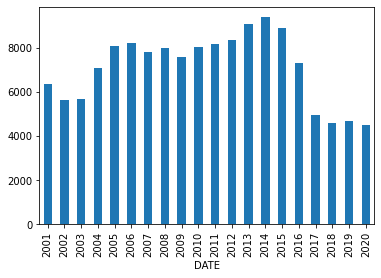

In [ ]:
data['DATE'].groupby(data["DATE"].dt.year).count().plot(kind="bar") ##https://stackoverflow.com/a/29036738/689288


In [ ]:
data.describe()

,STATION,SOURCE,LATITUDE,LONGITUDE,ELEVATION
count,1.428010e+05,142801.0,1.428010e+05,1.428010e+05,1.428010e+05
mean,7.864710e+10,4.0,1.393619e+01,-9.083583e+01,8.830000e+00
std,1.979835e-01,0.0,3.685420e-11,1.871576e-11,2.664545e-12
min,7.864710e+10,4.0,1.393619e+01,-9.083583e+01,8.830000e+00
25%,7.864710e+10,4.0,1.393619e+01,-9.083583e+01,8.830000e+00
50%,7.864710e+10,4.0,1.393619e+01,-9.083583e+01,8.830000e+00
75%,7.864710e+10,4.0,1.393619e+01,-9.083583e+01,8.830000e+00
max,7.864710e+10,4.0,1.393619e+01,-9.083583e+01,8.830000e+00


In [ ]:
data.to_csv('data_'+str(yr1)+'_'+str(yr2)+'_'+stn+'.csv',index=False)